In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

### *Avoid OOM errors by setting GPU Memory Compsumtion Growth*

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

### *Remove dodgy images*

In [ ]:
import cv2
import imghdr

In [ ]:
#/content/drive/MyDrive/Affective Image Classification Using Features inspired by Psychology and Art Theory/data
data_dir='/data'

In [ ]:
os.listdir(os.path.join(data_dir,'/content/drive/MyDrive/Affective Image Classification Using Features inspired by Psychology and Art Theory/data /Anger'))

['anger_0016.jpg',
 'anger_0012.jpg',
 'anger_0005.jpg',
 'anger_0022.jpg',
 'anger_0009.jpg',
 'anger_0018.jpg',
 'anger_0006.jpg',
 'anger_0008.jpg',
 'anger_0020.jpg',
 'anger_0007.jpg',
 'anger_0019.jpg',
 'anger_0002.jpg',
 'anger_0003.jpg',
 'anger_0001.jpg',
 'anger_0011.jpg',
 'anger_0017.jpg',
 'anger_0024.jpg',
 'anger_0254.jpg',
 'anger_0264.jpg',
 'anger_0800.jpg',
 'anger_0274.jpg',
 'anger_0257.jpg',
 'anger_0253.jpg',
 'anger_0263.jpg',
 'anger_0025.jpg',
 'anger_0272.jpg',
 'anger_0808.jpg',
 'anger_0256.jpg',
 'anger_0801.jpg',
 'anger_0026.jpg',
 'anger_0251.jpg',
 'anger_0029.jpg',
 'anger_0803.jpg',
 'anger_0261.jpg',
 'anger_0265.jpg',
 'anger_0271.jpg',
 'anger_0269.jpg',
 'anger_0260.jpg',
 'anger_0275.jpg',
 'anger_0255.jpg',
 'anger_0023.jpg',
 'anger_0027.jpg',
 'anger_0249.jpg',
 'anger_0258.jpg',
 'anger_0268.jpg',
 'anger_0802.jpg',
 'anger_0810.jpg',
 'anger_0270.jpg',
 'anger_0807.jpg',
 'anger_0273.jpg',
 'anger_0809.jpg',
 'anger_0266.jpg',
 'anger_0252

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img=cv2.imread(os.path.join('data','/content/drive/MyDrive/Affective Image Classification Using Features inspired by Psychology and Art Theory/data /Fear','fear_0679.jpg'))

In [ ]:
img.shape

(447, 447, 3)

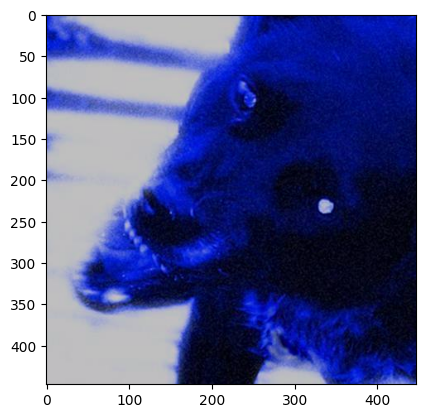

In [ ]:
plt.imshow(img)

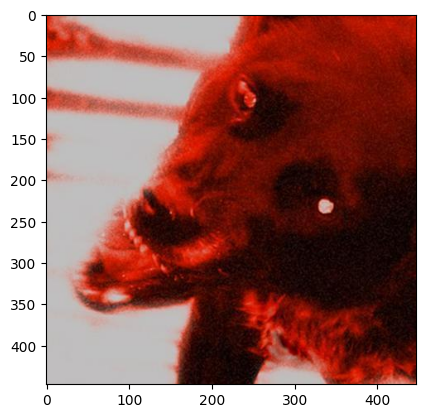

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## *Load Data*

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Affective Image Classification Using Features inspired by Psychology and Art Theory/data ')


Found 806 files belonging to 8 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
data_iterator


In [ ]:
#Get another batch from the iterator
batch=data_iterator.next()

In [ ]:
#Images represented as numpy arrays
batch[0].max()

255.0

In [ ]:

batch[1]

array([5, 2, 0, 6, 2, 2, 3, 5, 2, 3, 7, 6, 4, 2, 5, 1, 0, 1, 1, 6, 0, 5,
       6, 3, 5, 5, 3, 7, 6, 1, 5, 3], dtype=int32)

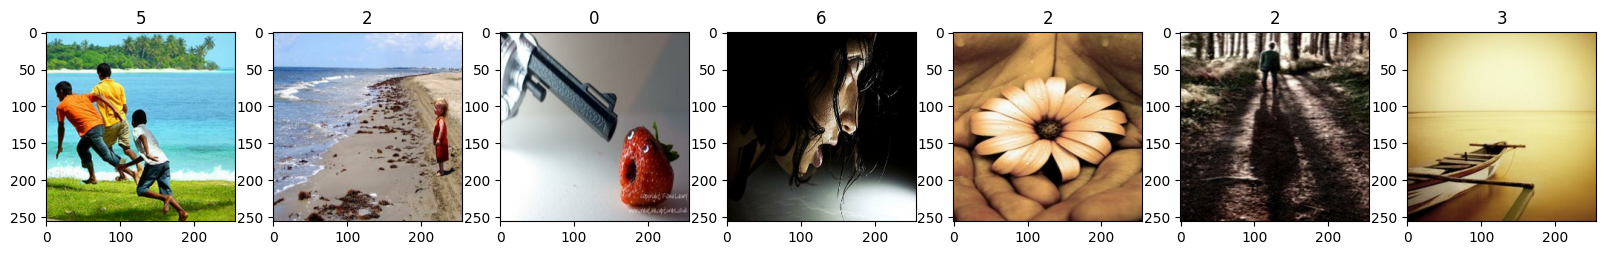

In [ ]:
fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## *Preprocess Data*

### *Scale Data*

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data_fjf= data.as_numpy_iterator()

In [ ]:
batch=data_fjf.next()

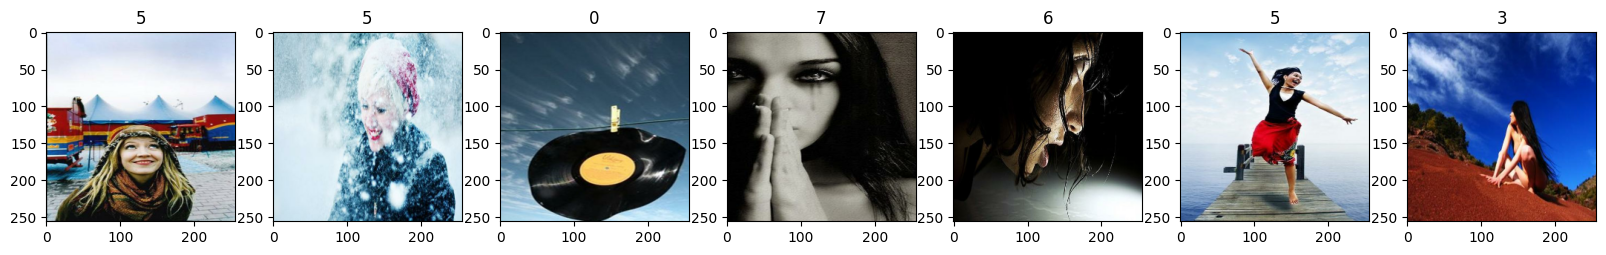

In [ ]:
fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### *Split data*

In [ ]:
len(data)

26

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 16)          0

In [ ]:
save_dir= "/results/"
model_name= 'image_class.h5/'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s' %model_path)

Saved trained model at /results/image_class.h5/
